In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Q1: Cleaning airbnb prices

### P1: Numeric airbnb data

In [136]:
# Load & look at data
df = pd.read_csv('data/airbnb_hw.csv')
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [137]:
# find the current variable type of the price column
df['Price'].dtype

dtype('O')

In [138]:
# remove the dollar sign and commas from the price column
df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '')

/var/folders/_2/97vvhj716y1gb9rdp5lcq27m0000gn/T/ipykernel_30448/3315267020.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '')


In [139]:
# Looking at column again
df['Price'].head()

0    145
1     37
2     28
3    199
4    549
Name: Price, dtype: object

In [140]:
# Turn price to numeric
df['Price'] = pd.to_numeric(df['Price'])

<Axes: ylabel='Frequency'>

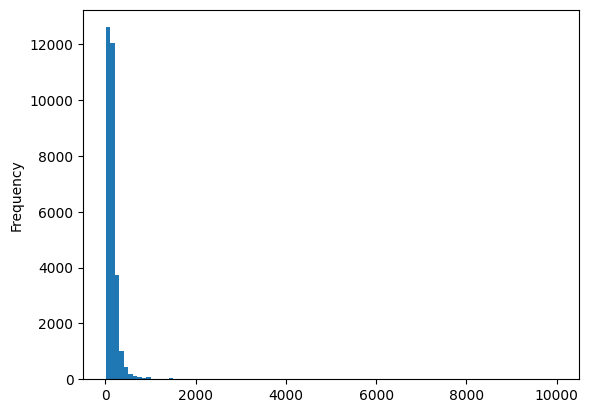

In [141]:
# Graph the price column
df['Price'].plot(kind='hist', bins=100)

In [142]:
# Count all NaN
df['Price'].isna().sum()
df['Price'].isnull().sum()

0

In [143]:
# replace the outliers with NaN
df['Price'] = df['Price'].apply(lambda x: np.nan if x > 1000 else x)

In [144]:
df['Price'].isna().sum()

135

<Axes: ylabel='Frequency'>

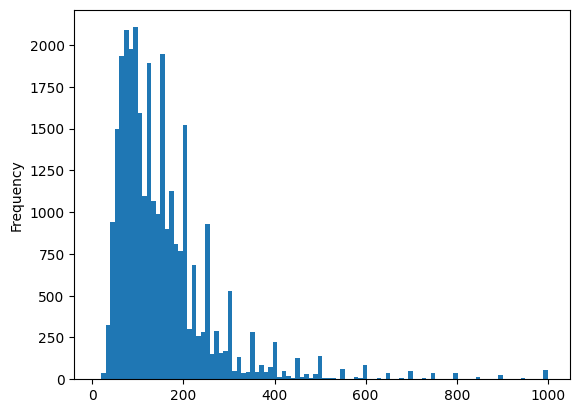

In [145]:
# Graph the price column again
df['Price'].plot(kind='hist', bins=100)

#### My choices:
First, I looked at the airbnb data to see what was going on with the 'Price' column. It looked numerical, with numbers averaging around 150-200. I then checked if it was actually numerical, and it was not. I found that it had entries that were not just numbers, so I stripped those elements away and the Price variable was able to be converted to 'numerical'. Then, I graphed it. There were some obvious outliers, and the graph was hard to look at. I found no 'NaN' values, but I made the decision to find and replace the outliers with NaN (resulting in a total of 135 new NaN) to hopefully balance the graph a bit more. I then graphed again and the data looked a lot more reliable.

### P2: Categorical Police Data

In [146]:
# read in police data
df = pd.read_csv('data/mn_police_use_of_force.csv')

In [147]:
# look at subject_injury column
df['subject_injury'].head(10)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9     No
Name: subject_injury, dtype: object

In [148]:
# Count all NaN
df['subject_injury'].isna().sum()

9848

In [149]:
# Count proportion of NaN to total
df['subject_injury'].isna().sum() / len(df)

0.7619342359767892

In [150]:
cross_tab = pd.crosstab(df['subject_injury'], df['force_type'])
cross_tab

force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal Projectile,Police K9 Bite,Taser
subject_injury,,,,,,,,,
No,0,1093,131,2,33,34,1,2,150
Yes,2,1286,41,0,44,40,2,44,172


In [151]:
# filling subject_injury column with No for NaN
df['subject_injury'] = df['subject_injury'].fillna('No')


In [152]:
cross_tab = pd.crosstab(df['subject_injury'], df['force_type'])
cross_tab

force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury,,,,,,,,,,,
No,2,8144,1552,2,60,108,87,1,170,33,1135
Yes,2,1286,41,0,44,40,0,2,0,44,172


#### My Choices
There was an extremely large portion of the subject injury column that was left with 'NaN' (76%). Looking at the cross tab results before and after cleaning, there seem to be a lot more force used on the NaN data, such as the tasers- which seems... interesting.

## P3: Dummy Variable Pretrial Data

In [153]:
# load in the data
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False)

In [154]:
# look at the first few rows of the WhetherDefendantWasReleasedPretrial column
df['WhetherDefendantWasReleasedPretrial'].head()

0    9
1    0
2    0
3    0
4    1
Name: WhetherDefendantWasReleasedPretrial, dtype: int64

In [155]:
# count the number of ' ' values in the column
df['WhetherDefendantWasReleasedPretrial'].value_counts()

1    19154
0     3801
9       31
Name: WhetherDefendantWasReleasedPretrial, dtype: int64

In [156]:
# replace missing values with NaN
df['WhetherDefendantWasReleasedPretrial'] = df['WhetherDefendantWasReleasedPretrial'].replace(9, np.nan)

In [157]:
# count NaN values
df['WhetherDefendantWasReleasedPretrial'].isna().sum()

31

## P4: Missing Values Pretrial Data

In [158]:
# look at ImposedSentenceAllChargeInContactEvent and SentenceTypeAllChargesAtConvictionInContactEvent columns
df[['ImposedSentenceAllChargeInContactEvent', 'SentenceTypeAllChargesAtConvictionInContactEvent']].head(20)

,ImposedSentenceAllChargeInContactEvent,SentenceTypeAllChargesAtConvictionInContactEvent
0,,9
1,60,0
2,12,1
3,.985626283367556,1
4,,4
5,12,0
6,36,1
7,6,0
8,24,1
9,12,1


In [159]:
# change the ImposedSentenceAllChargeInContactEvent column to numeric
df['ImposedSentenceAllChargeInContactEvent'] = pd.to_numeric( df['ImposedSentenceAllChargeInContactEvent'], errors='coerce')

In [160]:
# count missing values
df['ImposedSentenceAllChargeInContactEvent'].isna().sum()


9053

In [161]:
# change the SentenceTypeAllChargesAtConvictionInContactEvent column to numeric
df['SentenceTypeAllChargesAtConvictionInContactEvent'] = pd.to_numeric( df['SentenceTypeAllChargesAtConvictionInContactEvent'], errors='coerce')

In [162]:
# Fill NaN values in ImposedSentenceAllChargeInContactEvent with values from SentenceTypeAllChargesAtConvictionInContactEvent
df['ImposedSentenceAllChargeInContactEvent'] = df['ImposedSentenceAllChargeInContactEvent'].fillna(
    df['SentenceTypeAllChargesAtConvictionInContactEvent']
)

In [165]:
# round the ImposedSentenceAllChargeInContactEvent column to 0 decimal places
df['ImposedSentenceAllChargeInContactEvent'] = df['ImposedSentenceAllChargeInContactEvent'].round(0)

In [166]:
# look at ImposedSentenceAllChargeInContactEvent and SentenceTypeAllChargesAtConvictionInContactEvent columns
df[['ImposedSentenceAllChargeInContactEvent', 'SentenceTypeAllChargesAtConvictionInContactEvent']].head(20)

,ImposedSentenceAllChargeInContactEvent,SentenceTypeAllChargesAtConvictionInContactEvent
0,9.0,9
1,60.0,0
2,12.0,1
3,1.0,1
4,4.0,4
5,12.0,0
6,36.0,1
7,6.0,0
8,24.0,1
9,12.0,1


In [164]:
# count missing values
df['ImposedSentenceAllChargeInContactEvent'].isna().sum()

0

#### My Choices:
Looking at these columns- the data is dreadful. I took some time to try and figure out what was going on, and it seems like a form of 'pre-charges' and 'post-conviction-charges'. I first counted the NaNs, which ended up being over 9000. Then, I converted both columns to numeric as this seemed like a pretty reliable guess as to what the data was. Then, I had to figure out how to fill the NaNs. I decided that- in order to be convicted with some number of charges, you must first be charged with that many. So- optimistically, I've filled the NaNs with the number found in the second column. I also figured you couldn't be charged with .91273.... etc. of a charge, so I've also rounded the column. 